# Kaggle : Titanic competition

## Introduction

This is the work I did for the famous Kaggle competition **Titanic**.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

The notebook explains my work, the choices I did and the results I got.

## Data

In [361]:
import pandas as pd

training_file = "./data/train.csv"
test_file = "./data/test.csv"
gender_submission_file = "./data/gender_submission.csv"

In [362]:
training_data = pd.read_csv(training_file)
test_data = pd.read_csv(test_file)
gender_submission = pd.read_csv(gender_submission_file)

In [363]:
print("Training data : \n\n",training_data)

Training data : 

      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0     

In [364]:
print("Test data : \n\n",test_data)

Test data : 

     PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1              

In [365]:
print("Gender submission : ",gender_submission)

Gender submission :       PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392    

### What is inside training data ?

In [366]:
print("Taille des données d'entrainement : ",training_data.shape)

list_survivors = (training_data[:]["Survived"]==1)

training_survivor_proportion = 0
index_survivors = []
for i in range(training_data.shape[0]):
    if list_survivors[i]:
        training_survivor_proportion += 1
        index_survivors.append(i)
training_survivor_proportion /= training_data.shape[0]

print("Proportion de survivants : ",100*training_survivor_proportion)
print("Proportion de disparus : ",100*(1-training_survivor_proportion))



print("Taille des données de test : ",gender_submission.shape)

test_survivor_proportion = 0
for survived in gender_submission["Survived"]:
    if survived==1:
        test_survivor_proportion += 1
test_survivor_proportion /= gender_submission.shape[0]

print("Proportion de survivants : ",100*test_survivor_proportion)
print("Proportion de disparus : ",100*(1-test_survivor_proportion))



Taille des données d'entrainement :  (891, 12)
Proportion de survivants :  38.38383838383838
Proportion de disparus :  61.61616161616161
Taille des données de test :  (418, 2)
Proportion de survivants :36.36363636363637
Proportion de disparus :  63.63636363636363


The training dataset consists in 891 passengers, 61% of whom died and 39% survived.
The dataset is **not perfectly balanced**, that is something we should take into account in the next part.

In [367]:
print("Taille des données d'entrainement : ",training_data.shape)

training_data = training_data.copy().append(training_data.iloc[index_survivors[0:int(training_data.shape[0]*(1-2*training_survivor_proportion))+1]],ignore_index=True)

print("Taille des données d'entrainement : ",training_data.shape)

list_survivors = (training_data[:]["Survived"]==1)
training_survivor_proportion = 0
for i in range(training_data.shape[0]):
    if list_survivors.iloc[i]:
        training_survivor_proportion += 1
training_survivor_proportion /= training_data.shape[0]

print("Proportion de survivants : ",100*training_survivor_proportion)
print("Proportion de disparus : ",100*(1-training_survivor_proportion))



Taille des données d'entrainement :  (891, 12)
Taille des données d'entrainement :  (1099, 12)
Proportion de survivants :50.04549590536852
Proportion de disparus :  49.95450409463148


### Plan

The goal here is to learn from the training dataset, if a given passenger would survived the titanic shipwreck.

To do so, we have a few informations per passenger : 
- the passenger id (PassengerId)
- whether he survived or not (Survived)
- the ticket class (Pclass)
- his name (Name)
- his sex (Sex)
- his age (Age)
- the number of siblings/spouses aboard the Titanic (SibSp)
- the number of parents/children abroad the Titanic (Parch)
- the ticket number (Ticket)
- the passenger fare (Fare)
- the cabin number (Cabin)
- the port of embarkation (Embarked)

Those information include a number of interesting features (inputs) to predict the output : whether a passenger survive or not.

This is a classification problem, given a passenger, we would like to predict 1 if he survived and 0 otherwise. 

Different machine learning can be used in order predict that. 
For this particular one, I will try both **Recurrent Neural Network** and **Logistic Regression** and compare the results.



## 1st approach : Recurrent Neural Network

### Strucure of the Neural Network

- **the input layor** consists the features given in the training dataset and explained above
- **two headen layers**
- **the output layer** consists in one neuron, activated by the **sigmoid** function. With a threshold of 0.5, this neuron gives the prediction of the dead of a passenger.

The RNN is trained with keras (tensorflow) and tested on the test dataset.


### The input layer

The input layer is composed of 10 features (all information about a passenger except of his id, name, the ticket and cabin numbers, the fare, the embarkation location and whether he survived or not which is the output). It is a 10-element normalised vector.  

In [368]:
import numpy as np

features = ["Pclass","Sex","Age","SibSp","Parch"]

input_training_data = np.zeros((training_data.shape[0],len(features)))
output_training_data = np.zeros((training_data.shape[0],1))



max_age = training_data["Age"].max()
max_sibsp = training_data["SibSp"].max()
max_parch = training_data["Parch"].max()


for i in range(training_data.shape[0]):
    input_training_data[i][0] = ((training_data["Pclass"][i]-1)/2)
    input_training_data[i][1] = ["male","female"].index(training_data["Sex"][i])
    input_training_data[i][2] = training_data["Age"][i] / max_age 
    input_training_data[i][3] = training_data["SibSp"][i] / max_sibsp
    input_training_data[i][4] = training_data["Parch"][i] / max_parch

    if  len(np.where(np.isnan(input_training_data[i]))) > 0:
        for index in np.where(np.isnan(input_training_data[i])):
            input_training_data[i][index] = 0

    output_training_data[i] = training_data["Survived"][i]
    
    # Normalisation of inputs
    # input_training_data[i] /= np.sum(input_training_data[i]**2)
    input_training_data[i] -= np.mean(input_training_data[i])
    if np.std(input_training_data[i]) != 0:
        input_training_data[i] /= np.std(input_training_data[i])



print("Size of both sets : ",input_training_data.shape, output_training_data.shape)

print("Input at training time : ",input_training_data)
print("Output at training time : ",output_training_data)

Size of both sets :  (1099, 5) (1099, 1)
Input at training time :  [[ 1.92531264 -0.74873269 -0.01337023 -0.41447703 -0.74873269]
 [-0.83790882  1.78055624  0.40586208 -0.51060069 -0.83790882]
 [ 1.18190563  1.18190563 -0.30928372 -1.02726378 -1.02726378]
 ...
 [ 0.38380664  1.7879773  -0.95015547 -0.66932134 -0.55230712]
 [ 1.17953565  1.17953565 -1.03209369 -1.03209369 -0.29488391]
 [ 0.32610425  1.73374849 -0.83520225 -1.08153999 -0.1431105 ]]
Output at training time :  [[0.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [375]:
input_test_data = np.zeros((test_data.shape[0],len(features)))
output_test_data = np.zeros((test_data.shape[0],1))


max_age = test_data["Age"].max()
print(max_age)
max_sibsp = test_data["SibSp"].max()
max_parch = test_data["Parch"].max()


for i in range(test_data.shape[0]):
    input_test_data[i][0] = (test_data["Pclass"][i]-1)/2 
    input_test_data[i][1] = ["male","female"].index(test_data["Sex"][i])
    input_test_data[i][2] = test_data["Age"][i] / max_age 
    input_test_data[i][3] = test_data["SibSp"][i] / max_sibsp
    input_test_data[i][4] = test_data["Parch"][i] / max_parch


    if  len(np.where(np.isnan(input_test_data[i]))) > 0:
        for index in np.where(np.isnan(input_test_data[i])):
            input_test_data[i][index] = 0


    output_test_data[i] = gender_submission["Survived"][i]

    # Normalisation of inputs
    # input_test_data[i] /= np.sum(input_test_data[i]**2)
    # input_training_data[i] -= 0.5
    input_test_data[i] -= np.mean(input_test_data[i])
    if np.std(input_test_data[i]) != 0:
        input_test_data[i] /= np.std(input_test_data[i])



print("Size of both sets : ",input_test_data.shape, output_test_data.shape)

print("Input at test time : ",input_test_data)
print("Output at test time : ",output_test_data)

76.0
Size of both sets :  (418, 5) (418, 1)
Input at test time :  [[ 1.79185503 -0.73469381  0.41222639 -0.73469381 -0.73469381]
 [ 1.06804359  1.06804359  0.16503297 -1.00265317 -1.29846699]
 [ 0.70192644 -0.77991827  1.63782836 -0.77991827 -0.77991827]
 ...
 [ 1.7438071  -0.75203734  0.51230491 -0.75203734 -0.75203734]
 [ 2.         -0.5        -0.5        -0.5        -0.5       ]
 [ 1.98047778 -0.65041521 -0.65041521 -0.32155359 -0.35809377]]
Output at test time :  [[0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]

### Neural network training

In [370]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# definition of our keras model (using sequential neural network)
model = Sequential()
# add a hidden layer with 512 nodes with activation relu
model.add(Dense(256, input_dim=len(features), activation='relu'))
# add a little dropout 
model.add(Dropout(0.95))
# add an other hidden layer with 512 nodes with activation relu
model.add(Dense(128, activation='relu'))
# add a little dropout
model.add(Dropout(0.95))
# add the output layer with activation sigmoid
model.add(Dense(1, activation='sigmoid'))



In [371]:
# compiling the model with binary_crossentropy loss, adam optimizer and accuracy metrics 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# displaying the model
print(model.summary())
# training the model with training data, 10 epochs and batch of size 150
print(model.fit(input_training_data, output_training_data,epochs=10,batch_size=32,verbose=1,shuffle=True))
# evaluation of model accuracy
_ , acc = model.evaluate(input_test_data, output_test_data, batch_size=32)
print('test accuracy: ', acc)

print('Neural Network trained')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 256)               1536      
_________________________________________________________________
dropout_39 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_40 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 129       
Total params: 34,561
Trainable params: 34,561
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1099/1099 [==============================] - 4s 4ms/step - loss: 1.2007 - acc: 0.5305
Epoch 2/10
1099/1099 [==============

In [372]:
def predict(vec_sentence):
    """
    This function takes a sentence's vector and returns the output of the neural network (rounded to 0 or 1).
    """
    return np.round(model.predict(vec_sentence))

In [401]:
y = 22/(76)
list = np.zeros((1,5))
list[0][0] = 0
list[0][1] = 0
list[0][2] = y
list[0][3] = 0
list[0][4] = 0
predict(list)

array([[0.]], dtype=float32)

In [373]:
from sklearn.metrics import confusion_matrix
# results of the predictions with trained neural network
pred = [round(elt[0]) for elt in predict(input_test_data)]
# display part of the outcomes
print("Real outcomes : ",output_test_data[0:10])
print("Predicted outcomes : ",pred[0:10])
print("Confusion matrix : \n",confusion_matrix(output_test_data, pred))


Real outcomes :  [[0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]]
Predicted outcomes :  [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]
Confusion matrix : 
 [[266   0]
 [  0 152]]


AUC-ROC score :  1.0


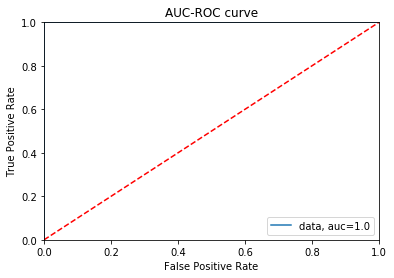

In [374]:
from sklearn.metrics import roc_auc_score

# computation of the AUC-ROC score
auc = roc_auc_score(output_test_data, pred)
print("AUC-ROC score : ",auc)



import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# calculate the false positive rate fpr and true positive tpr for all thresholds of the classification
probs = model.predict(input_test_data)
fpr, tpr, threshold = metrics.roc_curve(output_test_data, probs)

plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.title('AUC-ROC curve')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




## Conclusion du RNN



### Voies d'amélioration

Changer les paramètres (nb couches, neurones, etc)
Normaliser les features
Autres features relevant ? 

## Logistic Regression


C:\Users\Julienv\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
Logistic regression training accuracy :  0.7679708826205641
Predicted outcomes :  [0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
True outcomes :  [[0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]]
Accuracy on test set :  0.9712918660287081
Logistic confusion matrix : 
 [[254  12]
 [  0 152]]


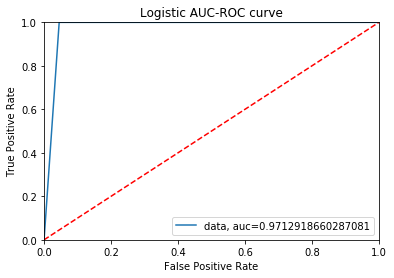

In [403]:
from sklearn.linear_model import LogisticRegression

X = input_training_data 
y = output_training_data

clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=100000, multi_class='ovr').fit(X, y)

print("Logistic regression training accuracy : ",clf.score(X, y))

logistic_prediction = clf.predict(input_test_data)
print("Predicted outcomes : ",logistic_prediction[:10])
print("True outcomes : ",output_test_data[:10])

# print("Predicted proba outcomes : ",clf.predict_proba(test_requests))

# calculation of the accuracy on test set
nb_right = 0
for i in range(len(logistic_prediction)):
    if logistic_prediction[i] == output_test_data[i]:
        nb_right += 1

print("Accuracy on test set : ",nb_right/len(logistic_prediction))

logistic_confusion_matrix = confusion_matrix(output_test_data,logistic_prediction)
print("Logistic confusion matrix : \n",logistic_confusion_matrix)


fpr, tpr, threshold = metrics.roc_curve(output_test_data, logistic_prediction)

plt.plot(fpr,tpr,label="data, auc="+str(nb_right/len(logistic_prediction)))
plt.title('Logistic AUC-ROC curve')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Conclusion 

Both methods, sequential neural network and logistic regression, gave impressivly high accuracy.